In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

attributes = [
    "attractive", "blurry_image", "sharp_jawline", "high_cheekbones", "smiling", "bald", "receeding_hairline", "long_hair", "curly_hair","grey_hair",
    "black_hair", "has_beard", "patchy_beard", "has_mustache", "well_groomed", "has_makeup", "wearing_glasses", "wearing_hat", "clear_skin",
    "dark_circles", "oily_skin", "thick_eyebrow", "big_eyes", "big_lips", "sharp_nose", "adult", "old", "mouth_open", "male", "double_chin", "veil",
     "wrinkle", "chubby"
    ]

df = pd.read_csv(r"Attributes.csv")
df = df.iloc[:, 1:]  # Remove the first column which is an index

df = df[attributes]

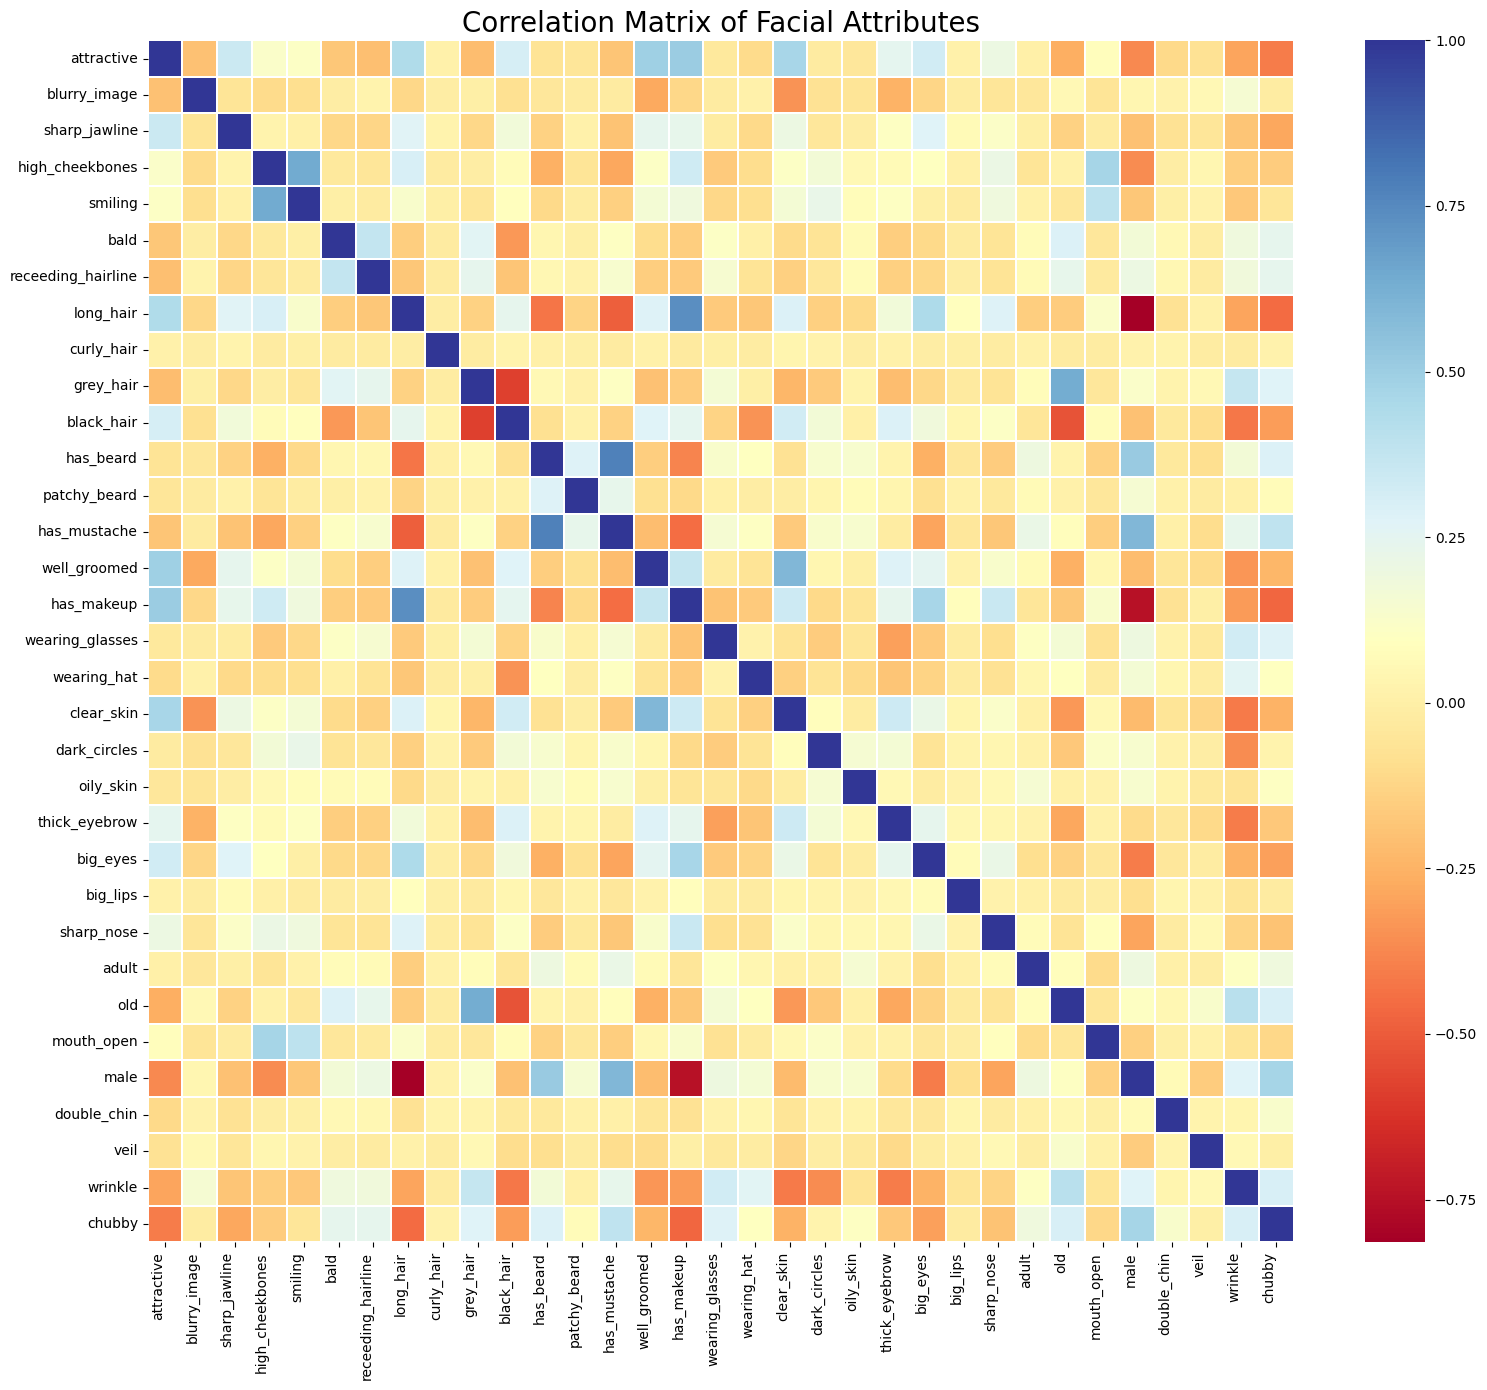

In [2]:

# --- Generate the Correlation Heatmap ---
plt.figure(figsize=(16, 14)) # Adjust figure size for better readability
sns.heatmap(df.corr(), annot=False, cmap='RdYlBu', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Facial Attributes', fontsize=20)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(rotation=0, ha='right', fontsize=10)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

Original number of columns: 33
Reduced to 17 columns based on a threshold of 0.5.

Final list of columns for the new matrix:
['adult', 'attractive', 'black_hair', 'clear_skin', 'dark_circles', 'grey_hair', 'has_beard', 'has_makeup', 'has_mustache', 'high_cheekbones', 'long_hair', 'male', 'oily_skin', 'old', 'smiling', 'well_groomed', 'wrinkle']


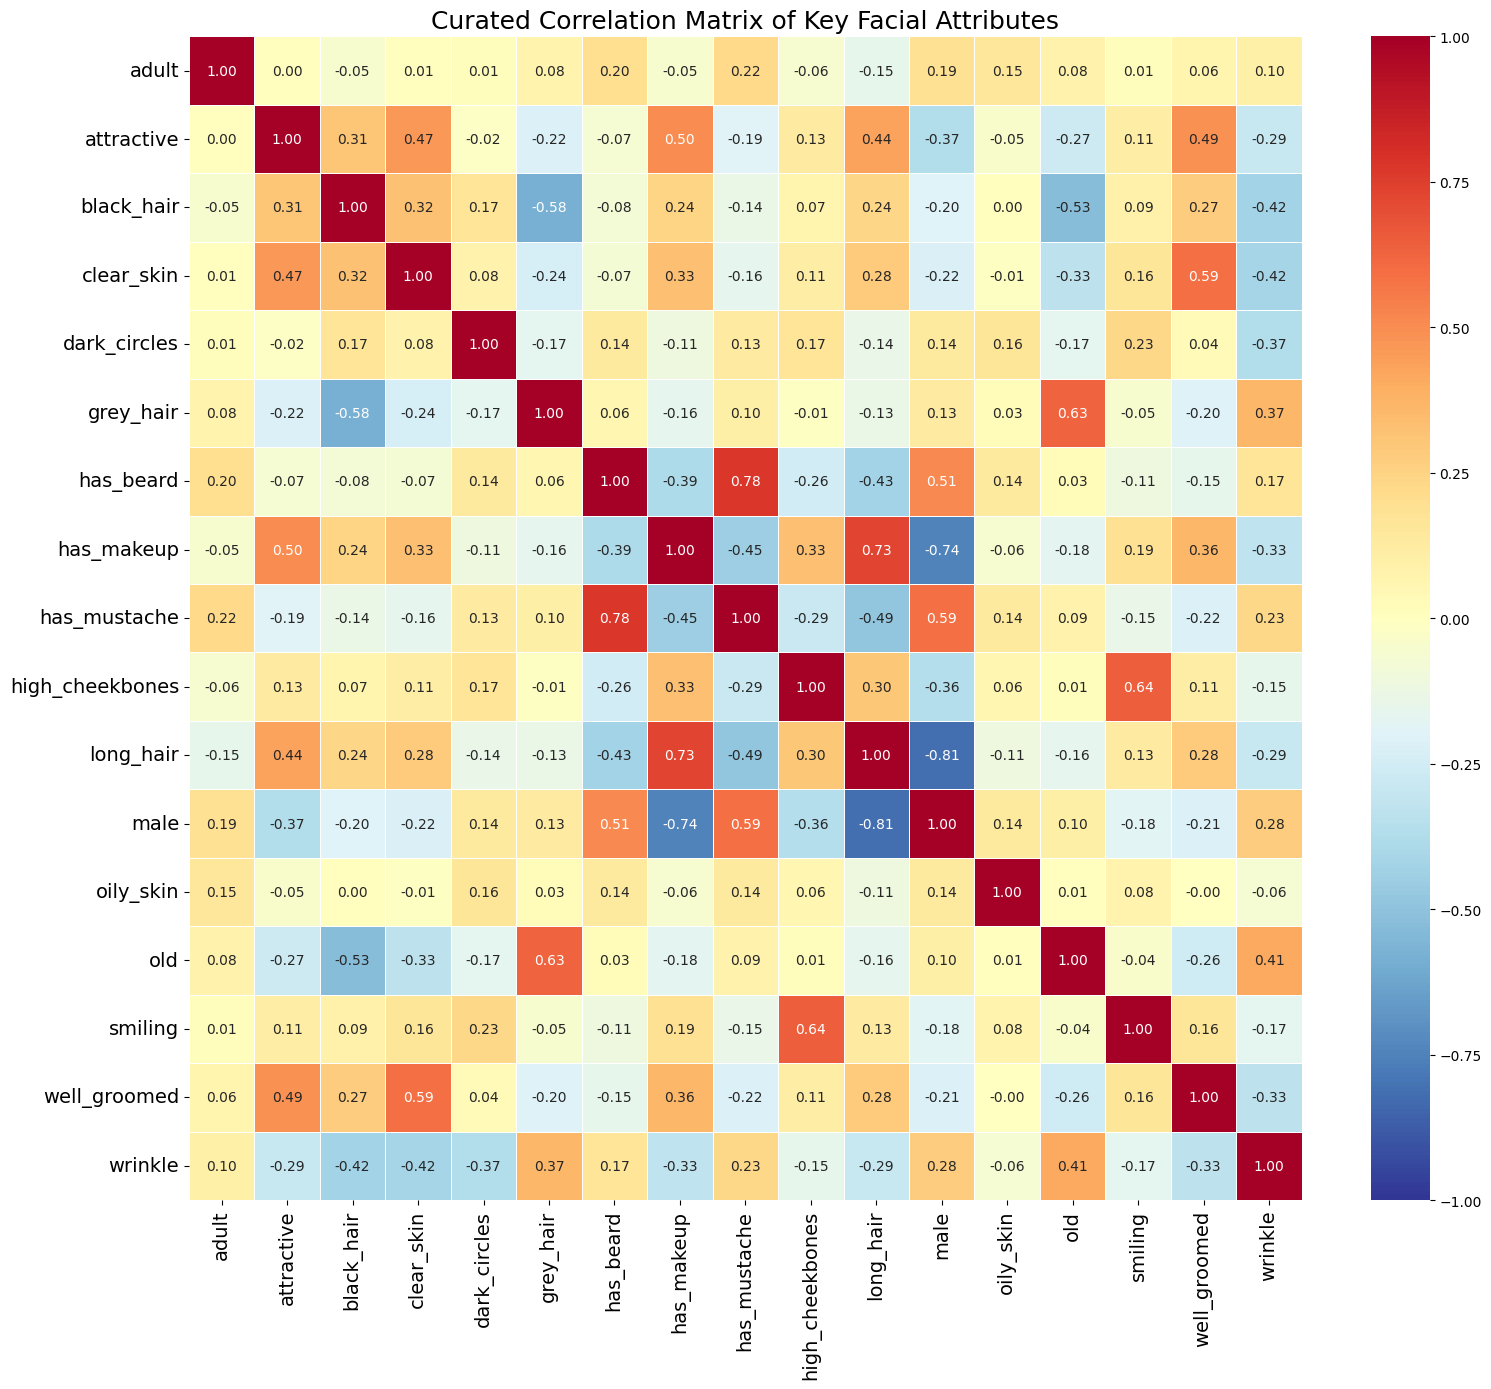

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Setup (Simulating your DataFrame) ---
# This list matches your 35 attributes.
all_attributes = [
    'attractive', 'blurry_image', 'sharp_jawline', 'high_cheekbones', 'smiling', 'bald', 
    'receeding_hairline', 'long_hair', 'curly_hair', 'grey_hair', 'black_hair', 'has_beard', 
    'patchy_beard', 'has_mustache', 'well_groomed', 'has_makeup', 'wearing_glasses', 
    'wearing_hat', 'clear_skin', 'dark_circles', 'oily_skin', 'thick_eyebrow', 'big_eyes', 
    'big_lips', 'sharp_nose', 'adult', 'old', 'mouth_open', 'male', 'double_chin', 'veil', 'wrinkle', 'chubby'
]



# --- 2. Calculate the Full Correlation Matrix ---
corr_matrix_full = df.corr()

# --- 3. Filter for Highly Correlated Columns ---
correlation_threshold = 0.5 
stacked_corr = corr_matrix_full.stack()
high_corr_pairs = stacked_corr[
    (abs(stacked_corr) > correlation_threshold) & (stacked_corr != 1.0)
]

interesting_columns = set()
for (col1, col2) in high_corr_pairs.index:
    interesting_columns.add(col1)
    interesting_columns.add(col2)

# --- 4. (RECOMMENDED) Add Your "Must-Have" Columns ---
must_have_columns = [
    'oily_skin', 'wrinkle', 'clear_skin', 
    'dark_circles', 'well_groomed', 'male', 'adult', 'old'
]

for col in must_have_columns:
    if col in df.columns:
        interesting_columns.add(col)
    
curated_columns_list = sorted(list(interesting_columns))

print(f"Original number of columns: {len(all_attributes)}")
print(f"Reduced to {len(curated_columns_list)} columns based on a threshold of {correlation_threshold}.")
print("\nFinal list of columns for the new matrix:")
print(curated_columns_list)

# --- 5. Create and Plot the New, Curated Matrix ---
df_curated = df[curated_columns_list]
corr_matrix_curated = df_curated.corr()

# --- 6. Plot the Final Heatmap (with Updates) ---

# --- UPDATED: Increased figsize to (16, 14) to make room ---
plt.figure(figsize=(16, 14)) 
sns.heatmap(
    corr_matrix_curated,
    annot=True,            
    fmt=".2f",             
    cmap="RdYlBu_r",       
    linewidths=0.5,
    vmin=-1,               
    vmax=1                 
)
plt.title('Curated Correlation Matrix of Key Facial Attributes', fontsize=18)

# --- UPDATED: Added fontsize=14 to both xticks and yticks ---
plt.xticks(rotation=90, fontsize=14) 
plt.yticks(rotation=0, fontsize=14)
# --- End of Updates ---

plt.tight_layout()     
plt.show()

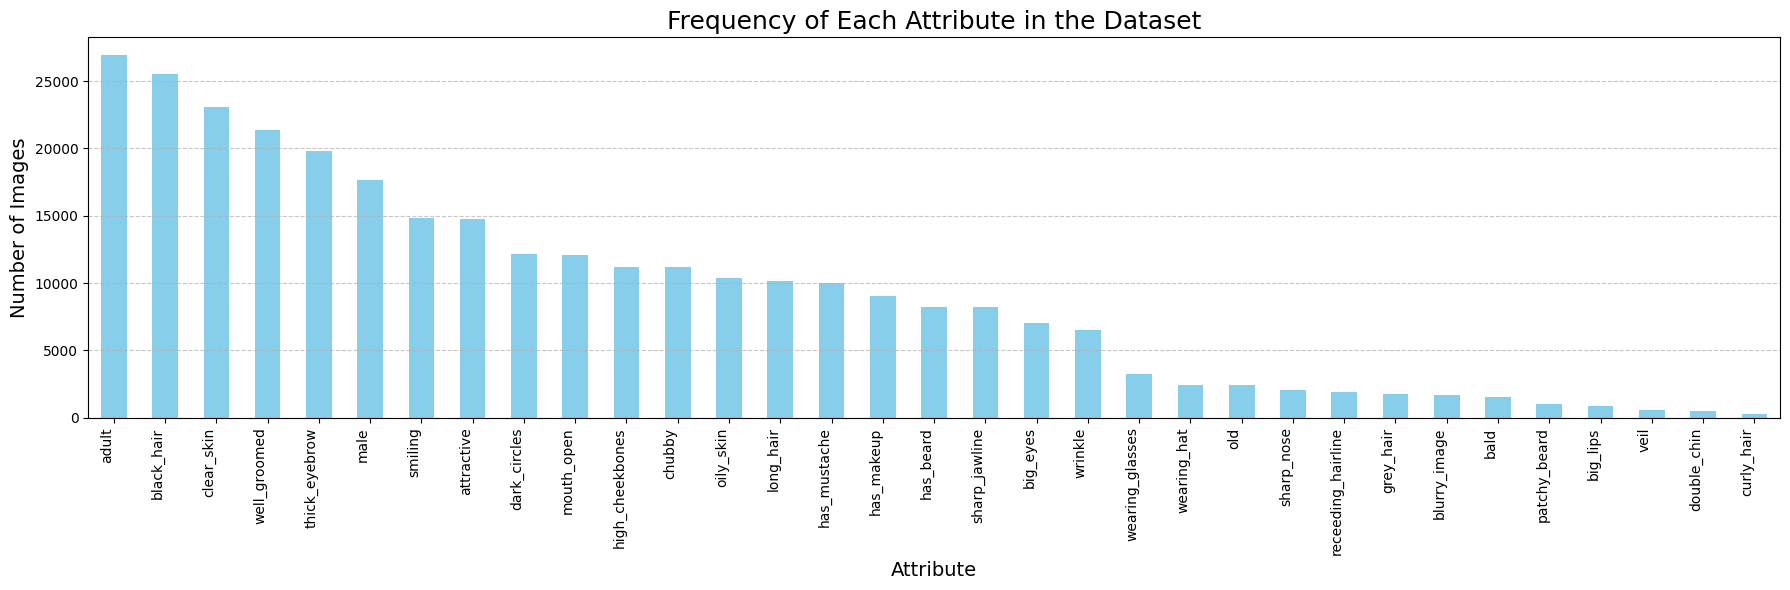

In [4]:
# Assuming 'df' is your DataFrame from the previous example
plt.figure(figsize=(18, 6)) # Adjust figure size
df.sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Attribute in the Dataset', fontsize=18)
plt.xlabel('Attribute', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

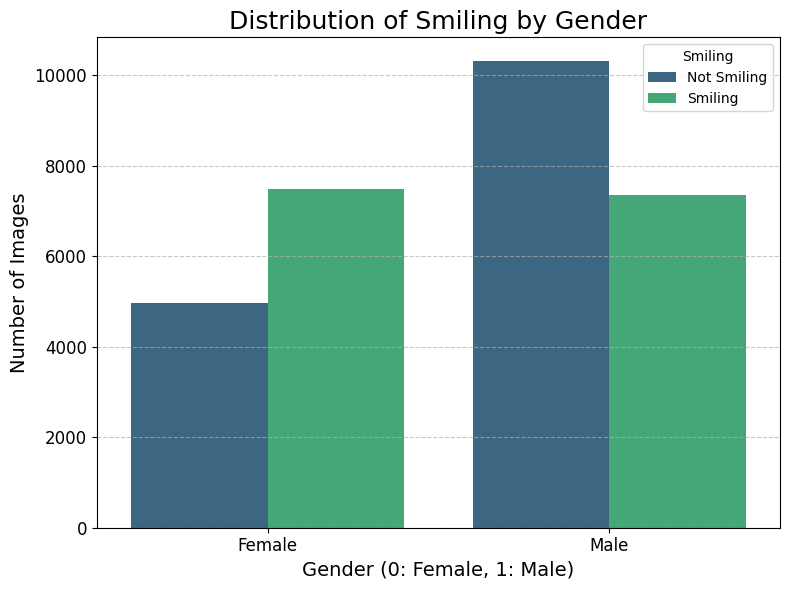

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='male', hue='smiling', data=df, palette='viridis')
plt.title('Distribution of Smiling by Gender', fontsize=18)
plt.xlabel('Gender (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Smiling', labels=['Not Smiling', 'Smiling'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

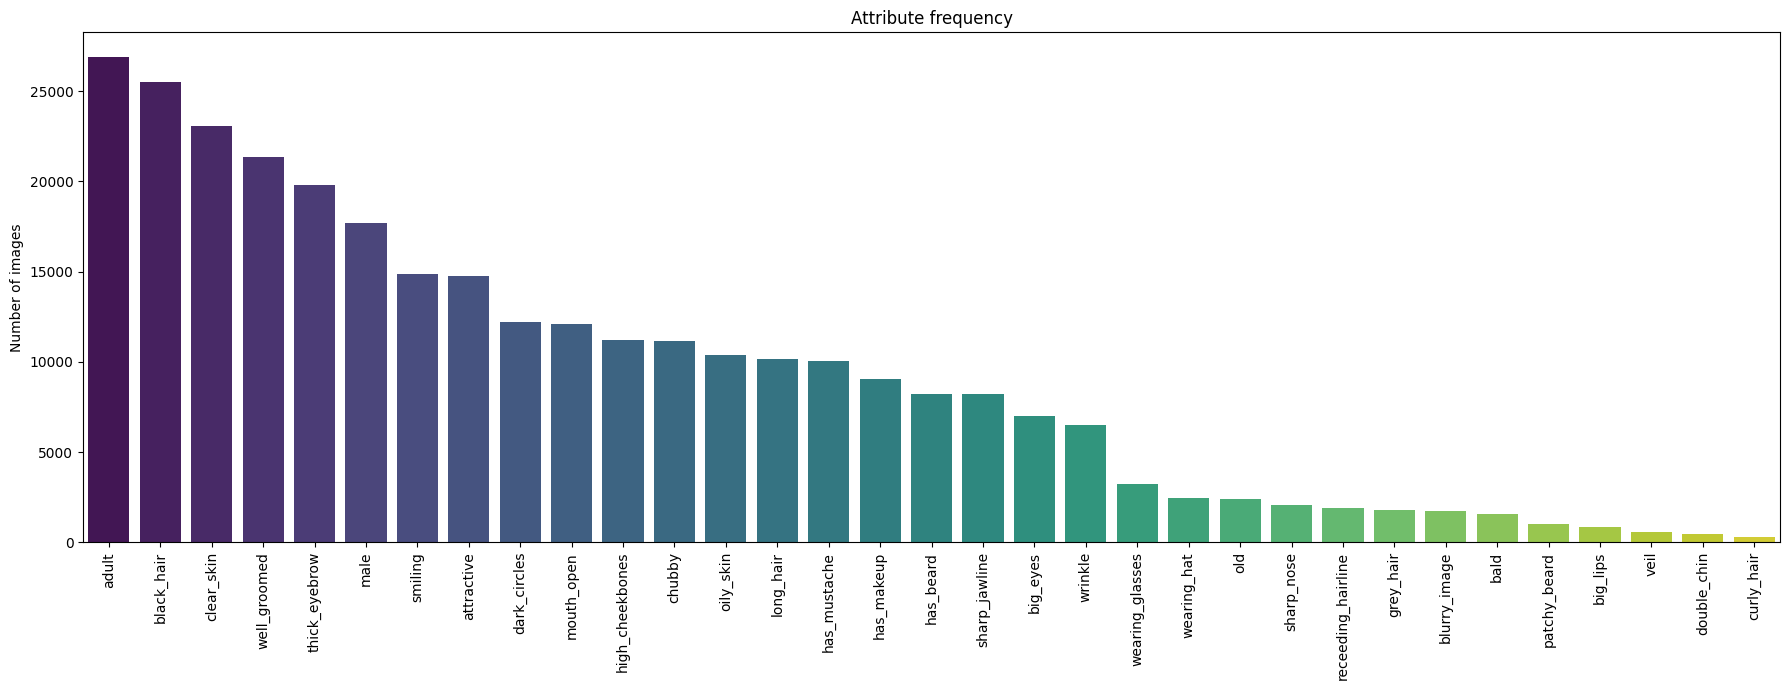

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,7))
counts = df[attributes].sum().sort_values(ascending=False)
sns.barplot(x=counts.index, y=counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("Number of images")
plt.title("Attribute frequency")
plt.tight_layout()
plt.show()

In [7]:
counts = df[attributes].sum().sort_values(ascending=False)
print(counts)

adult                 26908
black_hair            25520
clear_skin            23080
well_groomed          21360
thick_eyebrow         19822
male                  17687
smiling               14851
attractive            14727
dark_circles          12178
mouth_open            12090
high_cheekbones       11180
chubby                11161
oily_skin             10390
long_hair             10142
has_mustache          10042
has_makeup             9038
has_beard              8226
sharp_jawline          8217
big_eyes               6999
wrinkle                6494
wearing_glasses        3232
wearing_hat            2466
old                    2413
sharp_nose             2089
receeding_hairline     1895
grey_hair              1766
blurry_image           1718
bald                   1546
patchy_beard           1007
big_lips                867
veil                    584
double_chin             471
curly_hair              291
dtype: int64


Our dataset attributes:
['adult', 'attractive', 'bald', 'big_eyes', 'big_lips', 'black_hair', 'blurry_image', 'chubby', 'clear_skin', 'curly_hair', 'dark_circles', 'double_chin', 'grey_hair', 'has_beard', 'has_makeup', 'has_mustache', 'high_cheekbones', 'long_hair', 'male', 'mouth_open', 'oily_skin', 'old', 'patchy_beard', 'receeding_hairline', 'sharp_jawline', 'sharp_nose', 'smiling', 'thick_eyebrow', 'veil', 'wearing_glasses', 'wearing_hat', 'well_groomed', 'wrinkle']

CelebA attributes:
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'We

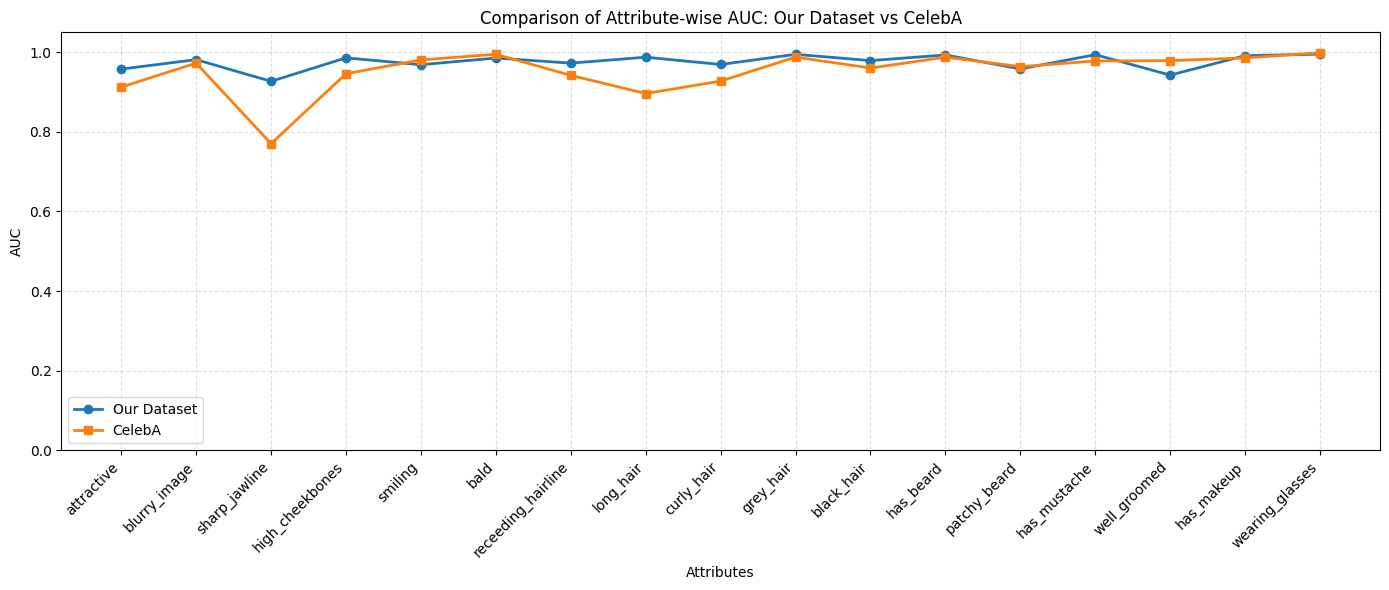

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# File paths
# ---------------- USER SETTINGS ----------------
OURS_CSV = r"C:\Users\Admin\Downloads\convnext_tiny_metrics.csv"
CELEBA_CSV = r"C:\Users\Admin\Downloads\celeba_convnext_tiny_metrics.csv"


# Column names in both CSVs
ATTR_COL = "attribute"   # column that stores attribute name
AUC_COL  = "auc"         # column that stores AUC score
# -------------------------------------------------

# ========= 1) LOAD DATA =========
df_ours   = pd.read_csv(OURS_CSV)
df_celeba = pd.read_csv(CELEBA_CSV)

print("Our dataset attributes:")
print(sorted(df_ours[ATTR_COL].unique()))
print("\nCelebA attributes:")
print(sorted(df_celeba[ATTR_COL].unique()))
print("\n")  # for readability

# ========= 2) MANUAL MAPPING (EDIT THIS) =========
# Left side  : attribute name in OUR dataset
# Right side : corresponding attribute name in CELEBA CSV
# I filled this based on semantic similarity to standard CelebA attributes.
# You can change / delete / add entries as you like.

ATTRIBUTE_MAPPING = {
    "attractive"        : "Attractive",
    "blurry_image"      : "Blurry",           # approx: jawline ↔ face shape
    "high_cheekbones"   : "High_Cheekbones",
    "smiling"           : "Smiling",
    "bald"              : "Bald",
    "big_lips"         : "Big_Lips",
    "receeding_hairline": "Receding_Hairline",      # choose "Wavy_Hair" if that fits better
    # "curly_hair"        : "Wavy_Hair",           # closest option in CelebA
    "grey_hair"         : "Gray_Hair",
    "black_hair"        : "Black_Hair",
    # "has_beard"         : "No_Beard",            # semantic complement (beard vs no beard)
    # sparse / light beard
    "has_mustache"      : "Mustache",       # generic “groomed” look
    "has_makeup"        : "Heavy_Makeup",    # specific type of makeup
    "wearing_glasses"   : "Eyeglasses",
    "wearing_hat"      : "Wearing_Hat",
    "thick_eyebrow"      : "Bushy_Eyebrows",
    "sharp_nose"       : "Pointy_Nose",
    "adult"             : "Adult",
    "mouth_open"        : "Mouth_Slightly_Open",
    "male"              : "Male",
    "double_chin"      : "Double_Chin",
    "chubby"           : "Chubby",
}

print("Attribute mapping (ours → celeba):")
for k, v in ATTRIBUTE_MAPPING.items():
    print(f"{k:20s} -> {v}")
print("\n")

# ========= 3) EXTRACT AUCs USING MAPPING =========
ours_auc   = []
celeba_auc = []
final_attrs = []

for ours_attr, celeba_attr in ATTRIBUTE_MAPPING.items():
    ours_row   = df_ours[df_ours[ATTR_COL] == ours_attr]
    celeba_row = df_celeba[df_celeba[ATTR_COL] == celeba_attr]

    if ours_row.empty:
        print(f"[WARN] '{ours_attr}' not found in OUR CSV, skipping.")
        continue
    if celeba_row.empty:
        print(f"[WARN] '{celeba_attr}' not found in CELEBA CSV, skipping.")
        continue

    ours_auc_val   = float(ours_row.iloc[0][AUC_COL])
    celeba_auc_val = float(celeba_row.iloc[0][AUC_COL])

    ours_auc.append(ours_auc_val)
    celeba_auc.append(celeba_auc_val)
    final_attrs.append(ours_attr)

# ========= 4) PLOT =========
x = range(len(final_attrs))

plt.figure(figsize=(14, 6))

plt.plot(x, ours_auc,   marker="o", linewidth=2, label="Our Dataset")
plt.plot(x, celeba_auc, marker="s", linewidth=2, label="CelebA")

plt.xticks(x, final_attrs, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("AUC")
plt.ylim(0.0, 1.05)
plt.title("Comparison of Attribute-wise AUC: Our Dataset vs CelebA")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
